In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
Data = pd.read_csv("hw6_dataset.csv")

## Question 2a

In [9]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def tanh(z):
    return (np.exp(z)-np.exp(-z)) / (np.exp(z) + np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)

def sigmoid_derivative(z):
    return z*(1-z)

def tanh_derivative(z):
    return 1-(z**2)

def ReLU_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [7]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],2) 
        self.weights2   = np.random.rand(2,1)
        self.bias1      = np.random.rand(2,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self, regularization_parameter):
        
        self.regularization_parameter=regularization_parameter
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * sigmoid_derivative(self.layer1)))
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * sigmoid_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)

## Question 2b - Ramdomly partitioning dataset into training, development and validation subsets

In [4]:
randomly_organized=Data.sample(frac=1)

In [5]:
train_set = randomly_organized[0:3000]
devel_set = randomly_organized[3000:4000]
valid_set = randomly_organized[4000:5000]

## Value of S1: 2  (because there are two input features a and b); value of S3: 1

## Question 2c

## sigmoid

In [10]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],2) 
        self.weights2   = np.random.rand(2,1)
        self.bias1      = np.random.rand(2,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self, regularization_parameter):
        
        self.regularization_parameter=regularization_parameter
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * sigmoid_derivative(self.layer1)))
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * sigmoid_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)
        



if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-6)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-6 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-6 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  1.00000000e+00]
 [  4.05980170e-01]
 [  4.05980170e-01]
 [  4.05980170e-01]
 [  4.05980170e-01]
 [  4.24100585e-77]
 [  1.00000000e+00]
 [  4.05980170e-01]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  4.24100585e-77]
 [  1.00000000e+00]
 [  4.05980170e-01]
 [  4.24100585e-77]]
707     1
4202    0
1631    1
2645    0
354     1
4985    0
2647    1
3261    0
4448    1
2483    1
3160    1
4577    0
2157    1
4799    0
3035    0
Name: label, dtype: int64
    


NameError: name 'Output' is not defined

In [12]:
def Output(x,w1,b1,w2,b2):
    layer1 = sigmoid(np.dot(x, w1)+np.repeat(b1,x.shape[0],axis=1).T) #A1
    OutPut = sigmoid(np.dot(layer1, w2)+b2) #A2
    return OutPut

In [164]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-5)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-5 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-5 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.32012098]
 [ 0.32012098]
 [ 0.32012098]
 [ 0.32012098]
 [ 0.32012098]
 [ 1.        ]
 [ 0.32012098]
 [ 0.32012098]
 [ 1.        ]
 [ 0.32012098]
 [ 0.32012098]
 [ 0.32012098]
 [ 1.        ]
 [ 0.32012098]
 [ 0.32012098]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-5 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-5 is 0.228


In [165]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-4)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-4 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-4 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  4.82627430e-001]
 [  1.00844655e-104]
 [  4.82627430e-001]
 [  4.82627430e-001]
 [  1.00844655e-104]
 [  4.82627430e-001]
 [  4.82627430e-001]
 [  4.82627430e-001]
 [  4.82627430e-001]
 [  1.00844655e-104]
 [  1.00844655e-104]
 [  1.00844655e-104]
 [  4.82627430e-001]
 [  4.82627430e-001]
 [  4.82627430e-001]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-4 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-4 is 0.0


In [167]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-3)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-3 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  5.51705584e-01]
 [  7.05371892e-95]
 [  5.51705584e-01]
 [  5.51705584e-01]
 [  7.05371892e-95]
 [  1.00000000e+00]
 [  5.51705584e-01]
 [  5.51705584e-01]
 [  1.00000000e+00]
 [  7.05371892e-95]
 [  7.05371892e-95]
 [  7.05371892e-95]
 [  1.00000000e+00]
 [  5.51705584e-01]
 [  5.51705584e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-3 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-3 is 0.0


In [168]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-2)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-2 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-2 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  3.97517181e-01]
 [  2.00290074e-50]
 [  3.97517181e-01]
 [  3.97517181e-01]
 [  2.00290074e-50]
 [  1.00000000e+00]
 [  3.97517181e-01]
 [  3.97517181e-01]
 [  1.00000000e+00]
 [  2.00290074e-50]
 [  2.00290074e-50]
 [  2.00290074e-50]
 [  1.00000000e+00]
 [  3.97517181e-01]
 [  3.97517181e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-2 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-2 is 0.228


In [169]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-1)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-1 is", misclassifications/1000)

[[  4.97256949e-01]
 [  3.59406365e-11]
 [  4.97256949e-01]
 [  4.97256949e-01]
 [  3.59406365e-11]
 [  9.99999986e-01]
 [  4.97256949e-01]
 [  4.97256949e-01]
 [  9.99999986e-01]
 [  3.59406365e-11]
 [  3.59406365e-11]
 [  3.59406365e-11]
 [  9.99999986e-01]
 [  4.97256949e-01]
 [  4.97256949e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-1 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-1 is 0.228


In [170]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

[[ 0.4939554 ]
 [ 0.00246812]
 [ 0.4939554 ]
 [ 0.4939554 ]
 [ 0.00247078]
 [ 0.99743033]
 [ 0.4939554 ]
 [ 0.4939554 ]
 [ 0.99743103]
 [ 0.00297879]
 [ 0.00246814]
 [ 0.00246815]
 [ 0.99743172]
 [ 0.49395538]
 [ 0.4939554 ]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1 is 0.228


In [171]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[ 0.65705404]
 [ 0.01566543]
 [ 0.65705346]
 [ 0.65705374]
 [ 0.01580065]
 [ 0.65705407]
 [ 0.65704911]
 [ 0.65704735]
 [ 0.65705414]
 [ 0.01778392]
 [ 0.01567177]
 [ 0.01567456]
 [ 0.65705386]
 [ 0.65648647]
 [ 0.65705305]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 10 is 0.0
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


In [172]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(100)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 100 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 100 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in multiply


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 100 is 0.0
percentage of misclassifications on validation set for regularization parameter = 100 is 0.0


## So the regularization parameter that gives the smallest error rate is 10. (Excluding the ones that give us overflows).

In [175]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 10 is", misclassifications/1000)
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

percentage of misclassifications on training set for regularization parameter = 10 is 0.0
percentage of misclassifications on development set for regularization parameter = 10 is 0.0
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


## tanh

In [176]:
def Output(x,w1,b1,w2,b2):
    layer1 = tanh(np.dot(x, w1)+np.repeat(b1,x.shape[0],axis=1).T) #A1
    OutPut = sigmoid(np.dot(layer1, w2)+b2) #A2
    return OutPut

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],2) 
        self.weights2   = np.random.rand(2,1)
        self.bias1      = np.random.rand(2,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        
        self.layer1 = tanh(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self,regularization_parameter):
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * tanh_derivative(self.layer1)))
        
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * tanh_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)


if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(5000):
        nn.feedforward()
        nn.backprop(1e-6)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-6 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-6 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-6 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-6 is 0.0


In [177]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-5)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("        ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-5 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-5 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
        
percentage of misclassifications on development set for regularization parameter = 1e-5 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-5 is 0.0


In [178]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-4)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-4 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-4 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-4 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-4 is 0.0


In [179]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-3)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("                    ")

Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)



misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-3 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on training set for regularization parameter = 1e-3 is 0.0
percentage of misclassifications on development set for regularization parameter = 1e-3 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-3 is 0.0


In [180]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-2)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-2 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-2 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-2 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-2 is 0.0


In [181]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-1 is", misclassifications/1000)

[[  4.94536115e-01]
 [  1.64246330e-16]
 [  4.94536115e-01]
 [  4.94536115e-01]
 [  1.64246330e-16]
 [  1.00000000e+00]
 [  4.94536115e-01]
 [  4.94536115e-01]
 [  1.00000000e+00]
 [  1.64246330e-16]
 [  1.64246330e-16]
 [  1.64246330e-16]
 [  1.00000000e+00]
 [  4.94536115e-01]
 [  4.94536115e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-1 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-1 is 0.228


In [190]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

[[ 0.99805371]
 [ 0.00125342]
 [ 0.99805818]
 [ 0.99805132]
 [ 0.00125342]
 [ 0.49694477]
 [ 0.99805938]
 [ 0.99805939]
 [ 0.49694477]
 [ 0.00126256]
 [ 0.00125342]
 [ 0.00125342]
 [ 0.49694477]
 [ 0.99805939]
 [ 0.99805938]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1 is 0.215
percentage of misclassifications on validation set for regularization parameter = 1 is 0.288


In [184]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[ 0.49389741]
 [ 0.00688066]
 [ 0.49389739]
 [ 0.4938974 ]
 [ 0.00692432]
 [ 0.9932421 ]
 [ 0.49389715]
 [ 0.49389703]
 [ 0.99324276]
 [ 0.00699072]
 [ 0.00688541]
 [ 0.00688126]
 [ 0.99324418]
 [ 0.49376614]
 [ 0.49389737]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 10 is 0.282
percentage of misclassifications on validation set for regularization parameter = 10 is 0.228


In [185]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(100)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 100 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 100 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 100 is 0.0
percentage of misclassifications on validation set for regularization parameter = 100 is 0.0


## For tanh, all the regularization parameters give roughly the same error rate on training, validation and development set. (Excluding the ones that gave us overflows). 

In [191]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("      ")


Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 1 is", misclassifications/1000)



Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)



misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

[[ 0.4943684 ]
 [ 0.49437054]
 [ 0.49437017]
 [ 0.49436815]
 [ 0.49437054]
 [ 0.99873542]
 [ 0.49437054]
 [ 0.49437054]
 [ 0.99873542]
 [ 0.49437054]
 [ 0.49437054]
 [ 0.49437054]
 [ 0.99873542]
 [ 0.49437054]
 [ 0.49437053]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
      
percentage of misclassifications on training set for regularization parameter = 1 is 0.74
percentage of misclassifications on development set for regularization parameter = 1 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1 is 0.228


## ReLU

In [193]:
def Output(x,w1,b1,w2,b2):
    layer1 = ReLU(np.dot(x, w1)+np.repeat(b1,x.shape[0],axis=1).T) #A1
    OutPut = sigmoid(np.dot(layer1, w2)+b2) #A2
    return OutPut


class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],2) 
        self.weights2   = np.random.rand(2,1)
        self.bias1      = np.random.rand(2,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        self.layer1 = ReLU(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self, regularization_parameter):
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * ReLU_derivative(self.layer1)))
        
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * ReLU_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)


if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-6)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-6 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-6 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.33238123]
 [ 0.        ]
 [ 0.33238123]
 [ 0.33238123]
 [ 0.        ]
 [ 1.        ]
 [ 0.33238123]
 [ 0.33238123]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.33238123]
 [ 0.33238123]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-6 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-6 is 0.228


In [194]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-5)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-5 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-5 is", misclassifications/1000)

[[ 0.25397652]
 [ 0.25397652]
 [ 0.25397652]
 [ 0.25397652]
 [ 0.25397652]
 [ 1.        ]
 [ 0.25397652]
 [ 0.25397652]
 [ 1.        ]
 [ 0.25397652]
 [ 0.25397652]
 [ 0.25397652]
 [ 1.        ]
 [ 0.25397652]
 [ 0.25397652]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-5 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-5 is 0.228


In [195]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-4)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-4 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-4 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.66338701]
 [ 0.        ]
 [ 0.66338701]
 [ 0.66338701]
 [ 0.        ]
 [ 1.        ]
 [ 0.66338701]
 [ 0.66338701]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.66338701]
 [ 0.66338701]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-4 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-4 is 0.0


In [196]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-3)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-3 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.82567359]
 [ 0.        ]
 [ 0.82567359]
 [ 0.82567359]
 [ 0.        ]
 [ 1.        ]
 [ 0.82567359]
 [ 0.82567359]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.82567359]
 [ 0.82567359]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-3 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-3 is 0.0


In [198]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-2)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-2 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-2 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.37305257]
 [ 0.        ]
 [ 0.37305257]
 [ 0.37305257]
 [ 0.        ]
 [ 1.        ]
 [ 0.37305257]
 [ 0.37305257]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.37305257]
 [ 0.37305257]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-2 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-2 is 0.228


In [199]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-1 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.3524318]
 [ 0.       ]
 [ 0.3524318]
 [ 0.3524318]
 [ 0.       ]
 [ 1.       ]
 [ 0.3524318]
 [ 0.3524318]
 [ 1.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 1.       ]
 [ 0.3524318]
 [ 0.3524318]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-1 is 0.283
percentage of misclassifications on validation set for regularization parameter = 1e-1 is 0.228


In [200]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

[[  4.34083891e-01]
 [  5.30997510e-18]
 [  4.34083891e-01]
 [  4.34083891e-01]
 [  1.34011926e-08]
 [  1.00000000e+00]
 [  4.34083891e-01]
 [  4.34083891e-01]
 [  1.00000000e+00]
 [  9.74094584e-06]
 [  3.17625948e-14]
 [  4.97294308e-15]
 [  1.00000000e+00]
 [  4.34083891e-01]
 [  4.34083891e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1 is 0.228


In [197]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[  7.52562148e-01]
 [  3.42054530e-05]
 [  7.52562148e-01]
 [  7.52562148e-01]
 [  2.86682820e-04]
 [  7.52562148e-01]
 [  7.52562148e-01]
 [  7.52562148e-01]
 [  7.52562148e-01]
 [  2.85663390e-03]
 [  4.77393516e-05]
 [  6.38854189e-05]
 [  7.52562148e-01]
 [  7.52562148e-01]
 [  7.52562148e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 10 is 0.0
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


In [201]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(100)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 100 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 100 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in add
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in add
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in add
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in maximum
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 100 is 0.0
percentage of misclassifications on validation set for regularization parameter = 100 is 0.0


## For ReLU, all the regularization parameter = 10 gave the best error rate on training, validation and development set. (Excluding the ones that gave us overflows).

In [204]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])

    
print("                    ")

misclassifications=0
Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 10 is", misclassifications/1000)




misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[  7.73765478e-01]
 [  5.00836714e-05]
 [  7.73765478e-01]
 [  7.73765478e-01]
 [  2.82202020e-04]
 [  7.73765478e-01]
 [  7.73765478e-01]
 [  7.73765478e-01]
 [  7.73765478e-01]
 [  2.38873472e-03]
 [  6.04014019e-05]
 [  8.26091864e-05]
 [  7.73765478e-01]
 [  7.73765478e-01]
 [  7.73765478e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on training set for regularization parameter = 10 is 0.0
percentage of misclassifications on development set for regularization parameter = 10 is 0.0
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


## Question 2d

## sigmoid

In [321]:
def Output(x,w1,b1,w2,b2):
    layer1 = sigmoid(np.dot(x, w1)+np.repeat(b1,x.shape[0],axis=1).T) #A1
    OutPut = sigmoid(np.dot(layer1, w2)+b2) #A2
    return OutPut

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],15) 
        self.weights2   = np.random.rand(15,1)
        self.bias1      = np.random.rand(15,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self, regularization_parameter):
        
        self.regularization_parameter=regularization_parameter
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * sigmoid_derivative(self.layer1)))
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * sigmoid_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)
        



if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-6)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-6 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-6 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  1.00000000e+000]
 [  1.61272546e-130]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.16244165e-178]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  7.10472850e-148]
 [  1.61272546e-130]
 [  1.61272546e-130]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-6 is 0.001
percentage of misclassifications on validation set for regularization parameter = 1e-6 is 0.0


In [207]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-5)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-5 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-5 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  1.00000000e+000]
 [  1.35887942e-044]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  6.05191130e-149]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.35891202e-044]
 [  1.47729795e-115]
 [  1.35821287e-044]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-5 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-5 is 0.0


In [208]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-4)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-4 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-4 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  1.00000000e+00]
 [  6.47336726e-47]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  6.47336782e-47]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.20199757e-58]
 [  6.47336795e-47]
 [  6.47336795e-47]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-4 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-4 is 0.0


In [209]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-3)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-3 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  1.00000000e+000]
 [  1.17283728e-126]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.17283728e-126]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.81977006e-079]
 [  1.17283728e-126]
 [  1.17283728e-126]
 [  1.00000000e+000]
 [  1.00000000e+000]
 [  1.00000000e+000]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-3 is 0.001
percentage of misclassifications on validation set for regularization parameter = 1e-3 is 0.0


In [210]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-2)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-2 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-2 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  1.00000000e+00]
 [  1.48044158e-52]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  3.24301963e-90]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.48044158e-52]
 [  1.66960321e-29]
 [  2.00288148e-52]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-2 is 0.002
percentage of misclassifications on validation set for regularization parameter = 1e-2 is 0.0


In [211]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-1)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-1 is", misclassifications/1000)

[[  9.97502731e-01]
 [  5.57163967e-43]
 [  9.97502731e-01]
 [  9.97502731e-01]
 [  3.01123533e-46]
 [  9.99956098e-01]
 [  9.97502731e-01]
 [  9.97502731e-01]
 [  9.99999992e-01]
 [  5.56770273e-43]
 [  1.36176075e-43]
 [  5.45080912e-43]
 [  9.99949595e-01]
 [  9.97502719e-01]
 [  9.97502731e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1e-1 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-1 is 0.0


In [212]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

[[  9.96883233e-01]
 [  7.03762577e-04]
 [  9.97081534e-01]
 [  9.96905132e-01]
 [  7.36595232e-04]
 [  9.99500191e-01]
 [  9.97188339e-01]
 [  9.97191346e-01]
 [  9.99565269e-01]
 [  4.05533436e-03]
 [  7.02300421e-04]
 [  7.06517019e-04]
 [  9.99591848e-01]
 [  9.97198688e-01]
 [  9.97183340e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 1 is 0.001
percentage of misclassifications on validation set for regularization parameter = 1 is 0.0


In [213]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[ 0.92673987]
 [ 0.00633067]
 [ 0.95654892]
 [ 0.9539713 ]
 [ 0.00687918]
 [ 0.99617274]
 [ 0.95911826]
 [ 0.95918171]
 [ 0.99617795]
 [ 0.00950164]
 [ 0.00641748]
 [ 0.00637019]
 [ 0.99629053]
 [ 0.95881231]
 [ 0.95738175]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 10 is 0.0
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


In [214]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(100)


    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
print("    ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 100 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)
misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 100 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
    
percentage of misclassifications on development set for regularization parameter = 100 is 0.0
percentage of misclassifications on validation set for regularization parameter = 100 is 0.0


# S2 = 15 is making significantly better predictions compared to S2 = 2.

## The regularization parameter that gives the smallest error rate is either 1 or 10. (Excluding the ones that give us overflows).

In [322]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)
        
    output_sigmoid=nn.output

Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 10 is", misclassifications/1000)
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

percentage of misclassifications on training set for regularization parameter = 10 is 0.001
percentage of misclassifications on development set for regularization parameter = 10 is 0.001
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


## tanh

In [337]:
def Output(x,w1,b1,w2,b2):
    layer1 = tanh(np.dot(x, w1)+np.repeat(b1,x.shape[0],axis=1).T) #A1
    OutPut = sigmoid(np.dot(layer1, w2)+b2) #A2
    return OutPut

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],15) 
        self.weights2   = np.random.rand(15,1)
        self.bias1      = np.random.rand(15,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        
        self.layer1 = tanh(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self,regularization_parameter):
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * tanh_derivative(self.layer1)))
        
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * tanh_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)


if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-6)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-6 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-6 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-6 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-6 is 0.0


In [218]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-5)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-5 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-5 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-5 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-5 is 0.0


In [219]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-4)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-4 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-4 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-4 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-4 is 0.0


In [220]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-3)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-3 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-3 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-3 is 0.0


In [221]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-2)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-2 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-2 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-2 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-2 is 0.0


In [222]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-1 is", misclassifications/1000)

[[  9.98486981e-01]
 [  1.03387286e-66]
 [  9.98486981e-01]
 [  9.98486981e-01]
 [  3.07364305e-64]
 [  9.99999991e-01]
 [  9.98486981e-01]
 [  9.98486981e-01]
 [  9.99998262e-01]
 [  1.02718336e-66]
 [  1.37309604e-66]
 [  1.03387289e-66]
 [  1.00000000e+00]
 [  9.98486981e-01]
 [  9.98486981e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1e-1 is 0.001
percentage of misclassifications on validation set for regularization parameter = 1e-1 is 0.0


In [223]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

[[  9.98272669e-01]
 [  2.11582151e-04]
 [  9.98277840e-01]
 [  9.98224470e-01]
 [  1.76867728e-04]
 [  9.99825647e-01]
 [  9.98304307e-01]
 [  9.98305127e-01]
 [  9.99815526e-01]
 [  4.86421948e-03]
 [  1.70648417e-04]
 [  1.90942342e-04]
 [  9.99917870e-01]
 [  9.98307803e-01]
 [  9.98306027e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 1 is 0.001
percentage of misclassifications on validation set for regularization parameter = 1 is 0.0


In [224]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[ 0.99067296]
 [ 0.00179194]
 [ 0.99153722]
 [ 0.99093549]
 [ 0.00201162]
 [ 0.99590834]
 [ 0.99220886]
 [ 0.99224778]
 [ 0.99589649]
 [ 0.00413502]
 [ 0.00182621]
 [ 0.00179903]
 [ 0.99593237]
 [ 0.9920841 ]
 [ 0.99208821]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 10 is 0.001
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


In [225]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(100)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    

print("     ")

Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 100 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 100 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
     
percentage of misclassifications on development set for regularization parameter = 100 is 0.0
percentage of misclassifications on validation set for regularization parameter = 100 is 0.0


# S2 = 15 is making significantly better predictions compared to S2 = 2.
## The regularization parameter that gives the smallest error rate is either 1 or 10. (Excluding the ones that give us overflows).

In [338]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 10 is", misclassifications/1000)
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

percentage of misclassifications on training set for regularization parameter = 10 is 0.001
percentage of misclassifications on development set for regularization parameter = 10 is 0.001
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


# ReLU

In [340]:
def Output(x,w1,b1,w2,b2):
    layer1 = ReLU(np.dot(x, w1)+np.repeat(b1,x.shape[0],axis=1).T) #A1
    OutPut = sigmoid(np.dot(layer1, w2)+b2) #A2
    return OutPut


class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],15) 
        self.weights2   = np.random.rand(15,1)
        self.bias1      = np.random.rand(15,1)
        
        self.bias2      = np.random.rand(1,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.delta_w2=np.zeros(np.shape(self.weights2))
        self.delta_b2=np.zeros(np.shape(self.bias2))
        self.delta_w1=np.zeros(np.shape(self.weights1))
        self.delta_b1=np.zeros(np.shape(self.bias1))
        

    def feedforward(self):
        self.layer1 = ReLU(np.dot(self.input, self.weights1)+np.repeat(self.bias1,self.input.shape[0],axis=1).T) #A1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)+self.bias2) #A2
        
        

    def backprop(self, regularization_parameter):
       
        d_weights2 = np.dot(self.layer1.T, (self.output-self.y))
        
        d_bias2 = np.sum(((self.output)[i] - (self.y)[i]) for i in range(len(self.input)))
        
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,  (np.dot(self.output-self.y, self.weights2.T) * ReLU_derivative(self.layer1)))
        
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        d_bias1 = np.sum(np.dot(self.output-self.y, self.weights2.T) * ReLU_derivative(self.layer1),0)
        

        self.delta_w2 += d_weights2
        self.delta_b2 += d_bias2
        self.delta_w1 += d_weights1
        
        self.delta_b1 += np.reshape(d_bias1,[-1,1])
        
       
        
        self.weights2 -= 0.1*((1/len(self.input))*self.delta_w2+regularization_parameter*self.weights2) #setting learning rate = 0.01, and tuning parameter=4
        
        self.bias2 -= 0.1*((1/len(self.input))*self.delta_b2)
        
        self.weights1 -= 0.1*((1/len(self.input))*self.delta_w1+regularization_parameter*self.weights1) #setting learning rate = 0.01 and tuning parameter=4
        
        self.bias1 -= 0.1*((1/len(self.input))*self.delta_b1)


if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-6)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-6 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-6 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.58208395]
 [ 0.        ]
 [ 0.58208395]
 [ 0.58208395]
 [ 0.        ]
 [ 1.        ]
 [ 0.58208395]
 [ 0.58208395]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.58208395]
 [ 0.58208395]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-6 is 0.0
percentage of misclassifications on validation set for regularization parameter = 1e-6 is 0.0


In [228]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-5)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-5 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-5 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-5 is 0.01
percentage of misclassifications on validation set for regularization parameter = 1e-5 is 0.008


In [229]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-4)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-4 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-4 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.46595274]
 [ 0.        ]
 [ 0.46595274]
 [ 0.46595274]
 [ 0.        ]
 [ 1.        ]
 [ 0.46595274]
 [ 0.46595274]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.46595274]
 [ 0.46595274]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-4 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-4 is 0.228


In [230]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-3)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-3 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-3 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  3.85450228e-08]
 [  0.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  1.00000000e+00]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-3 is 0.026
percentage of misclassifications on validation set for regularization parameter = 1e-3 is 0.025


In [231]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-2)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-2 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-2 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 0.46048859]
 [ 0.        ]
 [ 0.46048859]
 [ 0.46048859]
 [ 0.        ]
 [ 1.        ]
 [ 0.46048859]
 [ 0.46048859]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.46048859]
 [ 0.46048859]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-2 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1e-2 is 0.228


In [232]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1e-1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1e-1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1e-1 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1e-1 is 0.001
percentage of misclassifications on validation set for regularization parameter = 1e-1 is 0.0


In [233]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(1)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 1 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 1 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[  4.78452721e-001]
 [  4.01997871e-148]
 [  4.78452721e-001]
 [  4.78452721e-001]
 [  1.97933158e-078]
 [  1.00000000e+000]
 [  4.78452721e-001]
 [  4.78452721e-001]
 [  1.00000000e+000]
 [  1.67673001e-033]
 [  7.05918190e-135]
 [  4.26018439e-130]
 [  1.00000000e+000]
 [  4.78452721e-001]
 [  4.78452721e-001]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 1 is 0.282
percentage of misclassifications on validation set for regularization parameter = 1 is 0.228


In [234]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

[[  9.98460365e-01]
 [  2.13151606e-11]
 [  9.99486776e-01]
 [  9.98522430e-01]
 [  2.11634828e-06]
 [  9.99997877e-01]
 [  9.99960065e-01]
 [  9.99971360e-01]
 [  9.99996558e-01]
 [  5.90964594e-05]
 [  1.56521248e-10]
 [  1.42834561e-10]
 [  9.99999930e-01]
 [  9.99977046e-01]
 [  9.99961299e-01]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 10 is 0.001
percentage of misclassifications on validation set for regularization parameter = 10 is 0.0


In [235]:

if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(100)

    print(nn.output[0:15])
    print(train_set[0:15]['label'])
    
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

print("                    ")

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 100 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 100 is", misclassifications/1000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in maximum
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
3426    1
3849    0
2409    1
2901    1
4340    0
2022    1
1783    1
88      1
422     1
2277    0
372     0
1153    0
1733    1
2941    1
319     1
Name: label, dtype: int64
                    
percentage of misclassifications on development set for regularization parameter = 100 is 0.0
percentage of misclassifications on validation set for regularization parameter = 100 is 0.0


# S2 = 15 is making significantly better predictions compared to S2 = 2.
## The regularization parameter that gives the smallest error rate is 10. (Excluding the ones that give us overflows).

In [341]:
if __name__ == "__main__":
    X=np.array([train_set[0:3000]['a'],train_set[0:3000]['b']])
    y=np.array(train_set[0:3000]['label'])

    
    nn = NeuralNetwork(X.T,np.reshape(y,[-1,1]))


    for i in range(1500):
        nn.feedforward()
        nn.backprop(10)

Output_train=Output(np.array([train_set[0:3000]['a'],train_set[0:3000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(3000):
    if train_set[i:i+1]['label'].values-Output_train[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on training set for regularization parameter = 10 is", misclassifications/1000)
    
Output_dev=Output(np.array([devel_set[0:1000]['a'],devel_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if devel_set[i:i+1]['label'].values-Output_dev[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on development set for regularization parameter = 10 is", misclassifications/1000)

Output_valid=Output(np.array([valid_set[0:1000]['a'],valid_set[0:1000]['b']]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)

misclassifications = 0
for i in range(1000):
    if valid_set[i:i+1]['label'].values-Output_valid[i] >= 0.5:
        misclassifications += 1
print("percentage of misclassifications on validation set for regularization parameter = 10 is", misclassifications/1000)

percentage of misclassifications on training set for regularization parameter = 10 is 0.02
percentage of misclassifications on development set for regularization parameter = 10 is 0.004
percentage of misclassifications on validation set for regularization parameter = 10 is 0.007


## question 2e: Yes, I did encounter numerical underflow/overflow. It happens because the regularization parameter was too high/too low. A good way to prevent it is to use a reasonable range for regularization parameters.

## Question 2f

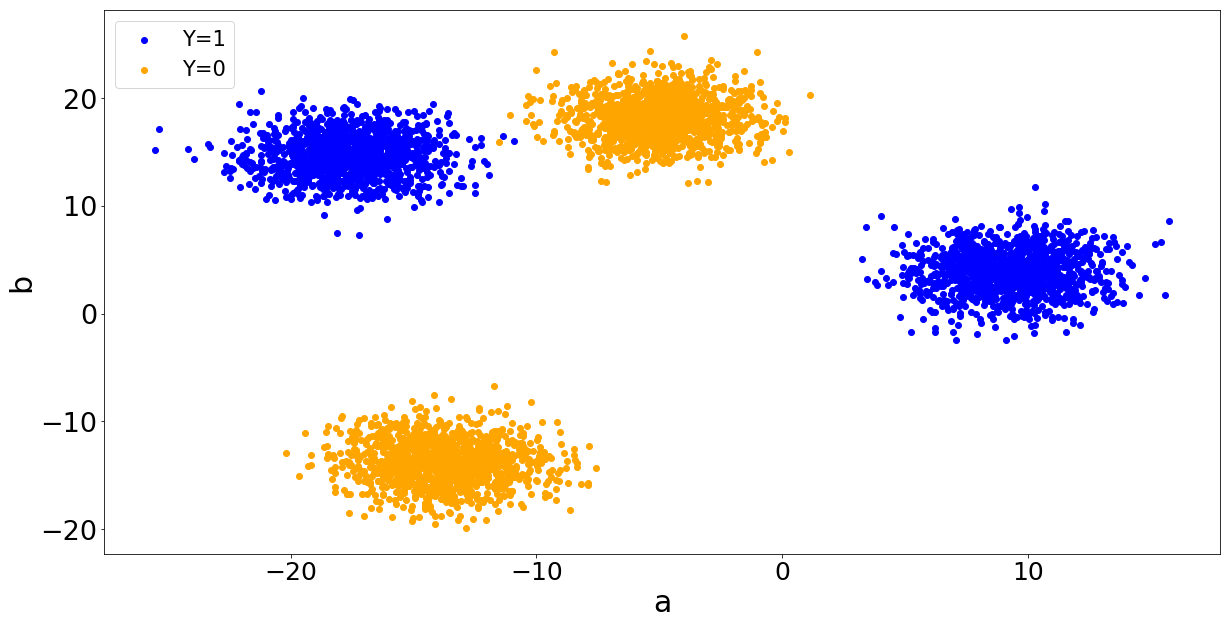

In [245]:
fig=plt.figure(figsize=(20,10))
plt.scatter(Data[Data['label']==1]['a'],Data[Data['label'] ==1]['b'],color='blue')
plt.scatter(Data[Data['label']==0]['a'],Data[Data['label']==0]['b'],color='orange') 
plt.legend(('Y=1', 'Y=0'),loc='upper left', fontsize=21)

plt.xlabel('a', fontsize=30)
plt.ylabel('b', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

## Sigmoid

In [323]:
xx1, xx2 = np.meshgrid(np.linspace(np.min(Data['a']), np.max(Data['a'])), np.linspace(np.min(Data['b']), np.max(Data['b'])))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probabilities=[]
for i in range(2500):
    probabilities.append(Output(np.array([xx1.ravel()[i],xx2.ravel()[i]]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)[0])

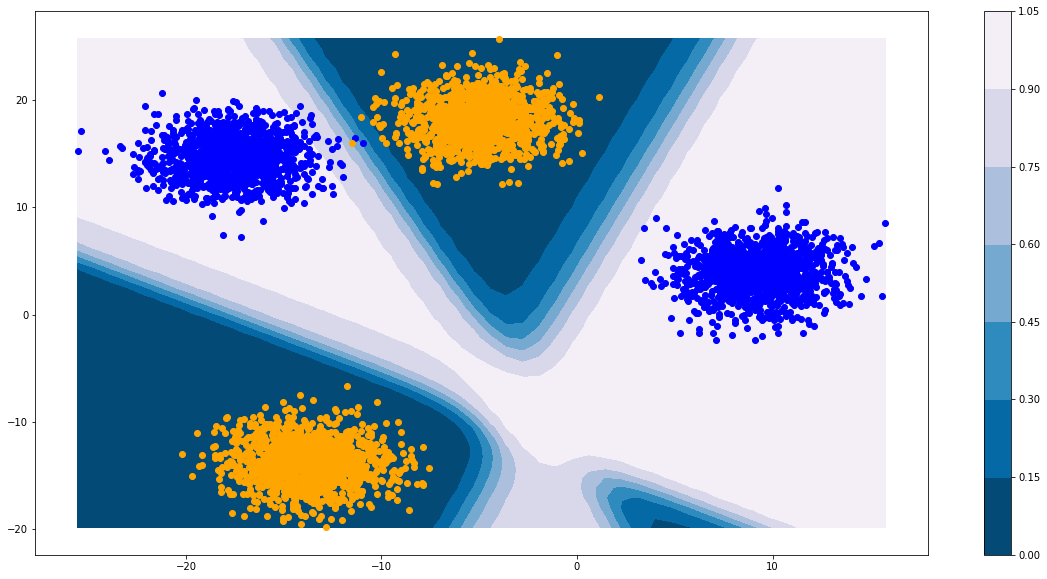

In [331]:
fig=plt.figure(figsize=(20,10))

A=plt.contourf(xx1, xx2, np.reshape(probabilities,[50,50]),cmap=cm.PuBu_r)
plt.scatter(Data[Data['label']==1]['a'],Data[Data['label'] ==1]['b'],color='blue')
plt.scatter(Data[Data['label']==0]['a'],Data[Data['label']==0]['b'],color='orange') 
plt.colorbar(A)
plt.show()


## tanh

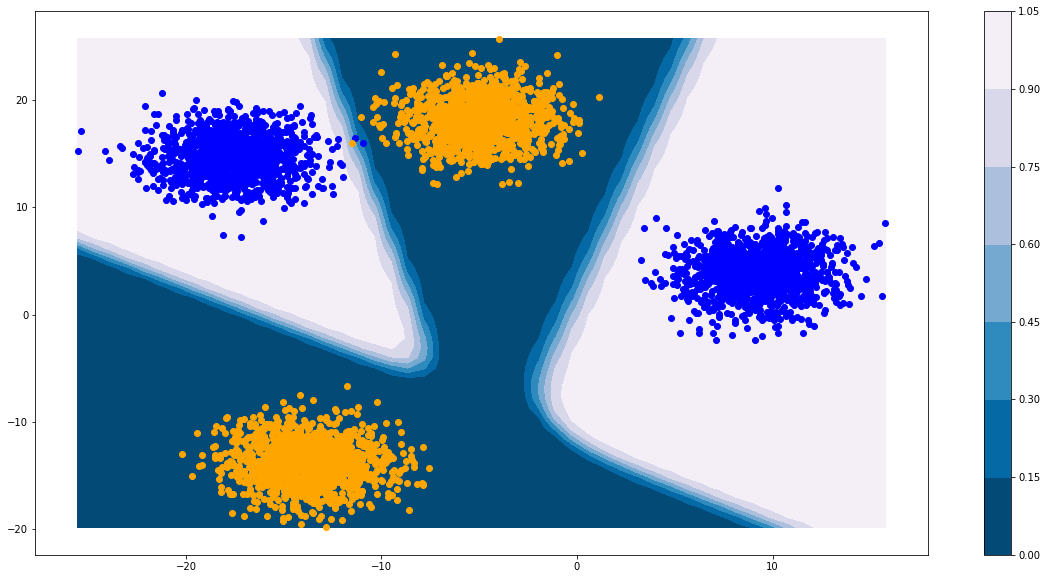

In [339]:
xx1, xx2 = np.meshgrid(np.linspace(np.min(Data['a']), np.max(Data['a'])), np.linspace(np.min(Data['b']), np.max(Data['b'])))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probabilities=[]
for i in range(2500):
    probabilities.append(Output(np.array([xx1.ravel()[i],xx2.ravel()[i]]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)[0])
    
fig=plt.figure(figsize=(20,10))

A=plt.contourf(xx1, xx2, np.reshape(probabilities,[50,50]),cmap=cm.PuBu_r)
plt.scatter(Data[Data['label']==1]['a'],Data[Data['label'] ==1]['b'],color='blue')
plt.scatter(Data[Data['label']==0]['a'],Data[Data['label']==0]['b'],color='orange') 
plt.colorbar(A)
plt.show()

## ReLU

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


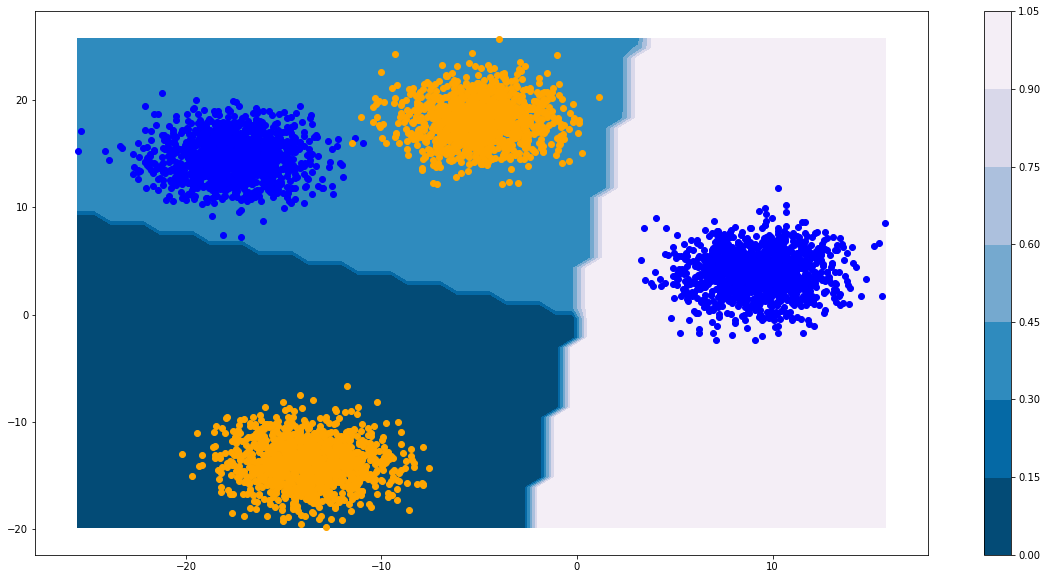

In [13]:
xx1, xx2 = np.meshgrid(np.linspace(np.min(Data['a']), np.max(Data['a'])), np.linspace(np.min(Data['b']), np.max(Data['b'])))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probabilities=[]
for i in range(2500):
    probabilities.append(Output(np.array([xx1.ravel()[i],xx2.ravel()[i]]).T,nn.weights1,nn.bias1,nn.weights2,nn.bias2)[0])
    
fig=plt.figure(figsize=(20,10))

A=plt.contourf(xx1, xx2, np.reshape(probabilities,[50,50]),cmap=cm.PuBu_r)
plt.scatter(Data[Data['label']==1]['a'],Data[Data['label'] ==1]['b'],color='blue')
plt.scatter(Data[Data['label']==0]['a'],Data[Data['label']==0]['b'],color='orange') 
plt.colorbar(A)
plt.show()

In [15]:
np.shape(probabilities)

(2500, 1)

## As you can see from the 3 figures above, sigmoid and tanh produce similar curved decision boundaries, whereas ReLU produces completely different linear decision boundaries.

## This is because the shapes of sigmoid and tanh functions are similar; but the shape of ReLU is a piece-wise linear function.